In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:06<00:00, 292MB/s]
100% 1.06G/1.06G [00:06<00:00, 171MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [21]:
#Create CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3) , padding='valid' , activation = 'relu' , input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [23]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [24]:
history = model.fit(train_ds , epochs=10 , validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 109ms/step - loss: 1.4896 - accuracy: 0.5763 - val_loss: 0.7083 - val_accuracy: 0.5774
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6128 - accuracy: 0.6655 - val_loss: 0.6164 - val_accuracy: 0.6822
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5173 - accuracy: 0.7438 - val_loss: 0.5173 - val_accuracy: 0.7438
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4591 - accuracy: 0.7824 - val_loss: 0.5506 - val_accuracy: 0.7172
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4150 - accuracy: 0.8098 - val_loss: 0.4682 - val_accuracy: 0.7836
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3530 - accuracy: 0.8446 - val_loss: 0.4385 - val_accuracy: 0.8036
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2730 - accuracy: 0.8783 - val_loss: 0.7778 - val_ac

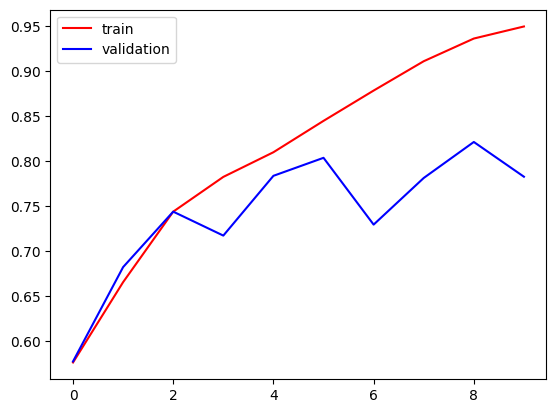

In [25]:
plt.plot(history.history['accuracy'] , color='red' , label='train')
plt.plot(history.history['val_accuracy'] , color='blue' , label='validation')
plt.legend()
plt.show()

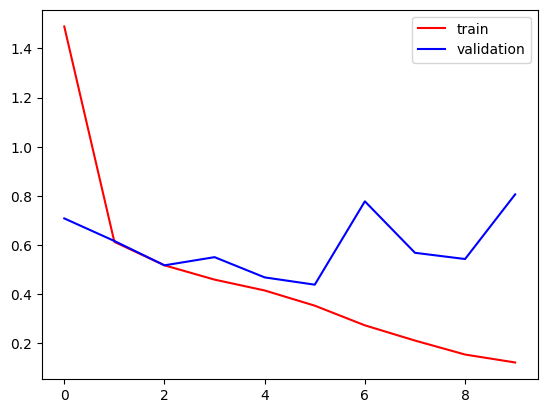

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'] , color='blue' , label = 'validation')
plt.legend()
plt.show()

In [27]:
import cv2

In [35]:
test_img = cv2.imread('/content/cat.jpeg')

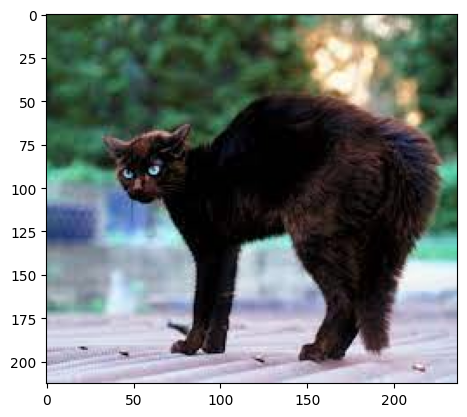

In [36]:
plt.imshow(test_img)


In [37]:
test_img.shape

(213, 237, 3)

In [38]:
test_img = cv2.resize(test_img,(256,256))

In [39]:
test_input = test_img.reshape((1,256,256,3))

In [40]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [41]:
model.save('cat_v_dog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
